# Part 2 : Histogram manipulation and equalisation

We are going to look at histogram equalisation. First, let us load the necessary packages and redefine some helper functions. Note that in this part of TP, you can use the plt.imshow function, since we are not interested in the aliasing effects which might occur.

In [2]:
from matplotlib import pyplot as plt
import numpy as np 
import imageio
from skimage import color

def read_image(file_name):
    img_color = imageio.imread(file_name)
    # NOTE : color.rgb2gray converts to the range 0 ... 1
    img_gray = color.rgb2gray(img_color)
    return img_gray,img_color
    
def write_image(img_in,file_name_out):
    imageio.imwrite(file_name_out, np.uint8(255.0*img_in))
    
def display_image(img_in):
    if (img_in.ndim == 2):
        plt.imshow(img_in,cmap='gray')
    elif (img_in.ndim == 3):
        # careful, in this case we supppose the pixel values are between 0 and 255
        plt.imshow(np.uint8(img_in))
    else:
        print('Error, unknown number of dimensions in image')
    return

(420, 570)

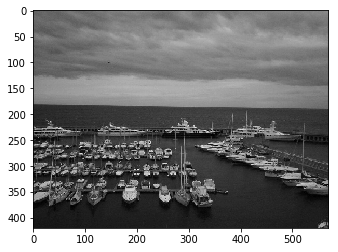

In [3]:
file_dir = 'images/'
file_name = 'boat'
file_ext = '.png'
img_gray,_ = read_image(file_dir+file_name+file_ext)
display_image(img_gray)
img_gray.shape

As you can see, this image has pretty bad contrast : it is difficult to see in it. Now, display the histogram of this image to show this (see the intro to images notebook for help)

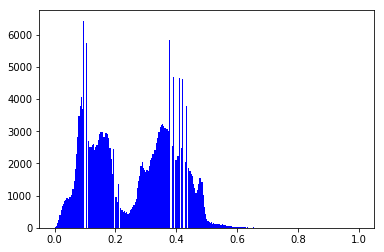

In [6]:
# FILL IN CODE
image_hist = plt.hist(img_gray.ravel(), bins=np.linspace(0,1,256), color = 'blue')

You will notice that the histogram is not very well spread out over the whole range of the image. We are going to correct this in this part of the TP, by imposing a __uniform histogram__ on the image.

Firstly, calculate the cumulative histogram $H$ of the image and display it (use the np.cumsum function).

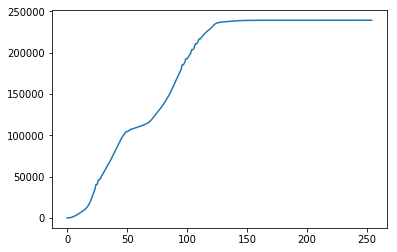

In [14]:
# FILL IN CODE
H = np.cumsum(image_hist[0])
_ = plt.plot(H)

## Histogram equalisation

Now, if we apply the cumulative histogram $H$ as a contrast change, then we are imposing a uniform histogram on the image (see the lesson slides). A contrast change means we do not change the order of the __values__ of the pixels. We are going to use $H$ as a type of lookup table to find the new values of the image.

In practice, this can be done with the following method :

- normalise the cumulative histogram such that the largest value is 1.0. This will map the final image to the interval $0, \dots, 1$ (you will still have a discrete list of values, but floating point ones)
- convert the image grey-levels back to the interval $\{0, \dots 255\}$ as int values (use the n. (=Mapper l'histogramme avec les index). This will allow us to use these values as indices in H
- apply the cumulative histogram to the values of the image pixels

Implement this algorithm now in a function ``equalize_histogram``. __Note__ In the ``np.histogram`` function, the histogram values have one less element than the histogram bins

In [9]:
from skimage import data, img_as_float
from skimage import exposure

def equalize_histogram(img_in):
    
    number_bins=256
    image_histogram, bins = np.histogram(img_in.flatten(), number_bins, density=True)
    
    # Compute cumsum of the histogram
    H = image_histogram.cumsum()
    
    #Normalise the cumulative histogram such that the largest value is 1.0. 
    H_normalized = (H - H.min())/(H.max() - H.min())
    
    #Checking the normalization
    print('Cumulative histogram values interval : [', int(H_normalized.min()) ,',', int(H_normalized.max()),']')
    
    #Converting grey-levels back to interval {0,...,255}
    img_convert = (img_in*255).astype(int)
    print('Image values interval : [', int(img_convert.min()) ,',', int(img_convert.max()),']')
    
    # use linear interpolation of H_norm to find new pixel values
    img_equalise = np.interp(img_in.flatten(), bins[:-1], H_normalized)
    
    return img_equalise.reshape(img_in.shape)


Carry out the algorithm on the input image and display the image. Is the result better ?

Cumulative histogram values interval : [ 0 , 1 ]
Image values interval : [ 0 , 182 ]


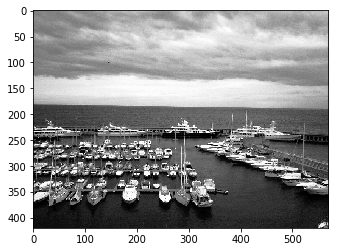

In [10]:
img_gray_equalise = equalize_histogram(img_gray)
display_image(img_gray_equalise)

Thanks to the algorithm, the image has a better contrast !

Now, display both the histogram and cumulative histogram of the equalised image

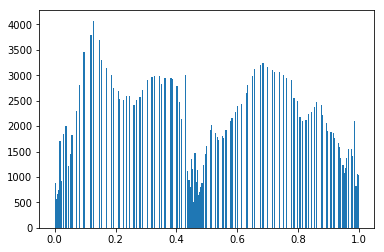

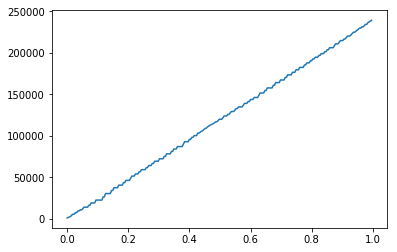

In [13]:
hist_vals, hist_bins,_ = plt.hist(img_gray_equalise.ravel(), bins=np.linspace(0,1,256))
plt.figure()
plt.plot(hist_bins[:-1],hist_vals.cumsum())

__Questions__ Is the histogram of the equalised image perfectly uniform (flat) ? Why is this the case ?

__Answer__ 

Although the histogram is more widespread, it is not uniform. We can explain this by the fact that by applying our equalization, we introduce a **contrast change** that can be defined as a non-decreasing function applied to the grey-level values of the image. Thus, although the energy of the image is spread over all the grey-level range, grey-level values will **keep their initial order**.



### Colour images

Let us try to apply our algorithm to a colour image. First, let's read the image and display it

(761, 1142, 3)

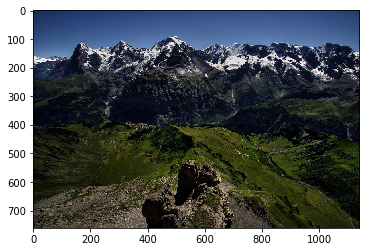

In [15]:
file_dir = 'images/'
file_name = 'alps_contrast'
file_ext = '.png'
_,img_color = read_image(file_dir+file_name+file_ext)
display_image(img_color)
img_color.shape

Now, create a function ``equalize_histogram_color`` which uses your grey-level function to carry out colour histogram equalisation in each colour channel independently, and display the output image. Careful to

- normalise the input range to $0, \dots, 1$ for each channel when processing it
- put the output range back to $0, \dots, 255$ when displaying.

To view the result better, you can write it to a file.

Cumulative histogram values interval : [ 0 , 1 ]
Image values interval : [ 0 , 255 ]
Cumulative histogram values interval : [ 0 , 1 ]
Image values interval : [ 0 , 255 ]
Cumulative histogram values interval : [ 0 , 1 ]
Image values interval : [ 0 , 255 ]


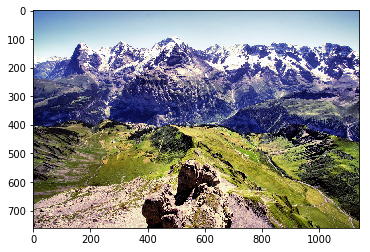

In [21]:
def equalize_histogram_color(img_color):
    # FILL IN CODE
    #Blue
    image_copy = img_color.copy() # Make a copy
    
    #In order to get the blue color, we set the red and green filters to 0
    image_copy[:,:,0] = 0
    image_copy[:,:,1] = 0
    image_blue = image_copy

    #Red
    image_copy = img_color.copy() # Make a copy
    #In order to get the red color, we set the blue and green filters to 0
    image_copy[:,:,1] = 0
    image_copy[:,:,2] = 0
    image_red = image_copy

    #Green
    image_copy = img_color.copy() # Make a copy
    #In order to get the green color, we set the blue and red filters to 0
    image_copy[:,:,0] = 0
    image_copy[:,:,2] = 0
    image_green = image_copy
    
    #We call our function equalize histogram on each of our images and sum them up. Hence, we will get back our RGB image.
    img_color_equalized = equalize_histogram(image_blue) + equalize_histogram(image_red) + equalize_histogram(image_green)   
    return img_color_equalized


img_color_equalized = equalize_histogram_color(img_color)
display_image(255.0 * img_color_equalized)

write_image(img_color_equalized,file_name+'_equalised.png')


__Question__ Do you think this result looks right ? What may be wrong in our approach ? What could be a solution to this ?

__Answer__

I believe that the result looks right : 
 * Contrast is way better : the image was brighten.
    
However, by applying independent equalization on each channel (R,G,B) we might face colors that are "out of balance". This is due to the change of **relative distribution** between colors of the channel.

In order to correct this problem, instead of taking the three channels' histograms independently and sum them up, we could use an average histogram of the three channels' histogram.

    
    